# Packt Publishing Test

## Goals :

###  Part I

Scrape the following data from websites:
1.	Title
2.	Date of Publishing

### Part II


1. For each of the publisher, group the books falling under a particular technology
   for example- Java, JavaScript, React, Node, Lego, machine learning, data analysis, and so on. 

2. Understand and compare the technology-wise coverage for each of the publisher. 

3. Identify who has more number of books for a particular technology, and who has lesser books for that tech. Interpret  this data using percentage and weights.


### Part III

Create tree-maps for each of the publisher.


##### Notebook structure
1. Importing libraries.
2. Defining helper functions.
3. Acquiring the data.
4. Determining the group of the books falling under a particular technology. 
5. Understand and compare the technology-wise coverage for each of the publisher.
6. Tree map for particular technology of each of the publisher.






# 1. Importing libraries
Run the following cell to install the needed libraries.

In [177]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import squarify


# 2. Defining Helper function


1. get_data()
2. get_word_cloud()
3. get_word_count()
4. get_tree_map()


In [186]:
def get_data(url):
    response = requests.get(url)
    content = response.content
    parser = BeautifulSoup(content, 'html.parser')
    return parser


    
    


In [187]:

def get_word_cloud(df):
# join titles to a single string
    TitlesDocument = ' '.join(df["Title"])
    no_urls_no_tags = " ".join([word for word in TitlesDocument.split()])
    wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     )
    wordcloud.generate(no_urls_no_tags)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig('./Titles.png', dpi=300)
    plt.show()

In [189]:
def word_count(df):
    tokenized_title = []
    for item in df["Title"]:
        tokenized_title.append(item.split(" "))
    
    punctuation = [",", ":", ";", ".", "'", '"', "’", "?", "/", "-", "+", "&", "(", ")"]
    clean_tokenized = []
    for item in tokenized_title:
        tokens = []
        for token in item:
            token = token.lower()
            for punc in punctuation:
                token = token.encode('utf-8').replace(punc, "")
            tokens.append(token)
        clean_tokenized.append(tokens)
    
    
unique_tokens = []
single_tokens = []
for tokens in tokenized_title:
    for token in tokens:
        if token not in single_tokens:
            single_tokens.append(token)
        elif token in single_tokens and token not in unique_tokens:
            unique_tokens.append(token)
counts = pd.DataFrame(0, index=np.arange(len(clean_tokenized)), columns=unique_tokens)


for i, item in enumerate(clean_tokenized):
    for token in item:
        if token in unique_tokens:
            counts.iloc[i][token] += 1

word_counts = counts.sum(axis=0)
print(word_counts)    

In [190]:
def get_tree_map(df,website):
    
# read data from csv file
    df = df.set_index("Category")
    df2 = df.sort_values(by="Percentage", ascending=False)

    # treemap parameters
    x = 0.
    y = 0.
    width = 100.
    height = 100.
    cmap = matplotlib.cm.viridis

# color scale on the categories
# min and max values 
    mini, maxi = df2.Percentage.min(), df2.Percentage.max()
    norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    colors = [cmap(norm(value)) for value in df2.Percentage]
    colors[1] = "#FBFCFE"

# labels for squares
    labels = ["%s" % (label) for label in df2.index]

# make plot
    fig = plt.figure(figsize=(12, 10))
    fig.suptitle("website", fontsize=20)
    ax = fig.add_subplot(111, aspect="equal")
    ax = squarify.plot(df2.Percentage,label=labels, color=colors, ax=ax, alpha=.7)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Categories", fontsize=14)

# color bar
# create dummy invisible image with a color map
    img = plt.imshow([df2.Percentage], cmap=cmap)
    img.set_visible(False)
    fig.colorbar(img, orientation="vertical", shrink=.96)

    fig.text(.76, .9, "Percentage", fontsize=14)
    plt.show()

# 3.  Acquiring the data

 

In [191]:
url_pragmetic = 'https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=all&f[skill_level]=All&f[title_contains]='
url_nostarch = "https://www.nostarch.com/catalog.htm"
url_dummies = "http://www.dummies.com/store/Computers-Internet.html"

In [192]:
books = get_data(url_pragmetic).find_all("li", class_="book-cover-item")


In [193]:
PragmaticList=[]
for book in books:
    Title=book['data-title']
    date=book['data-pubdate'].replace('&', '')
    Year=(date.split("-")[0])
    PragmaticList.append((Title,date,Year))


In [194]:
PragmaticDataFrame=pd.DataFrame(PragmaticList, columns=["Title","Date of Publishing","Year"]) 

In [195]:
PragmaticDataFrame.shape

(151, 3)

In [196]:
PragmaticDataFrame.head(5)

,Title,Date of Publishing,Year
0,take my money,2017-02-10,2017
1,programming elixir 1.3,2016-11-10,2016
2,agile web development with rails 5,2016-09-15,2016
3,way of the web tester,2016-09-10,2016
4,build real-time web apps with phoenix,2016-08-16,2016


In [27]:
PragmaticDataFrame.to_csv("PragmaticDataFrame.csv")

# 4. Determining the group/category of the books.

## Word Cloud for Pragmatic Book's Title

In [197]:
get_word_cloud(PragmaticDataFrame)

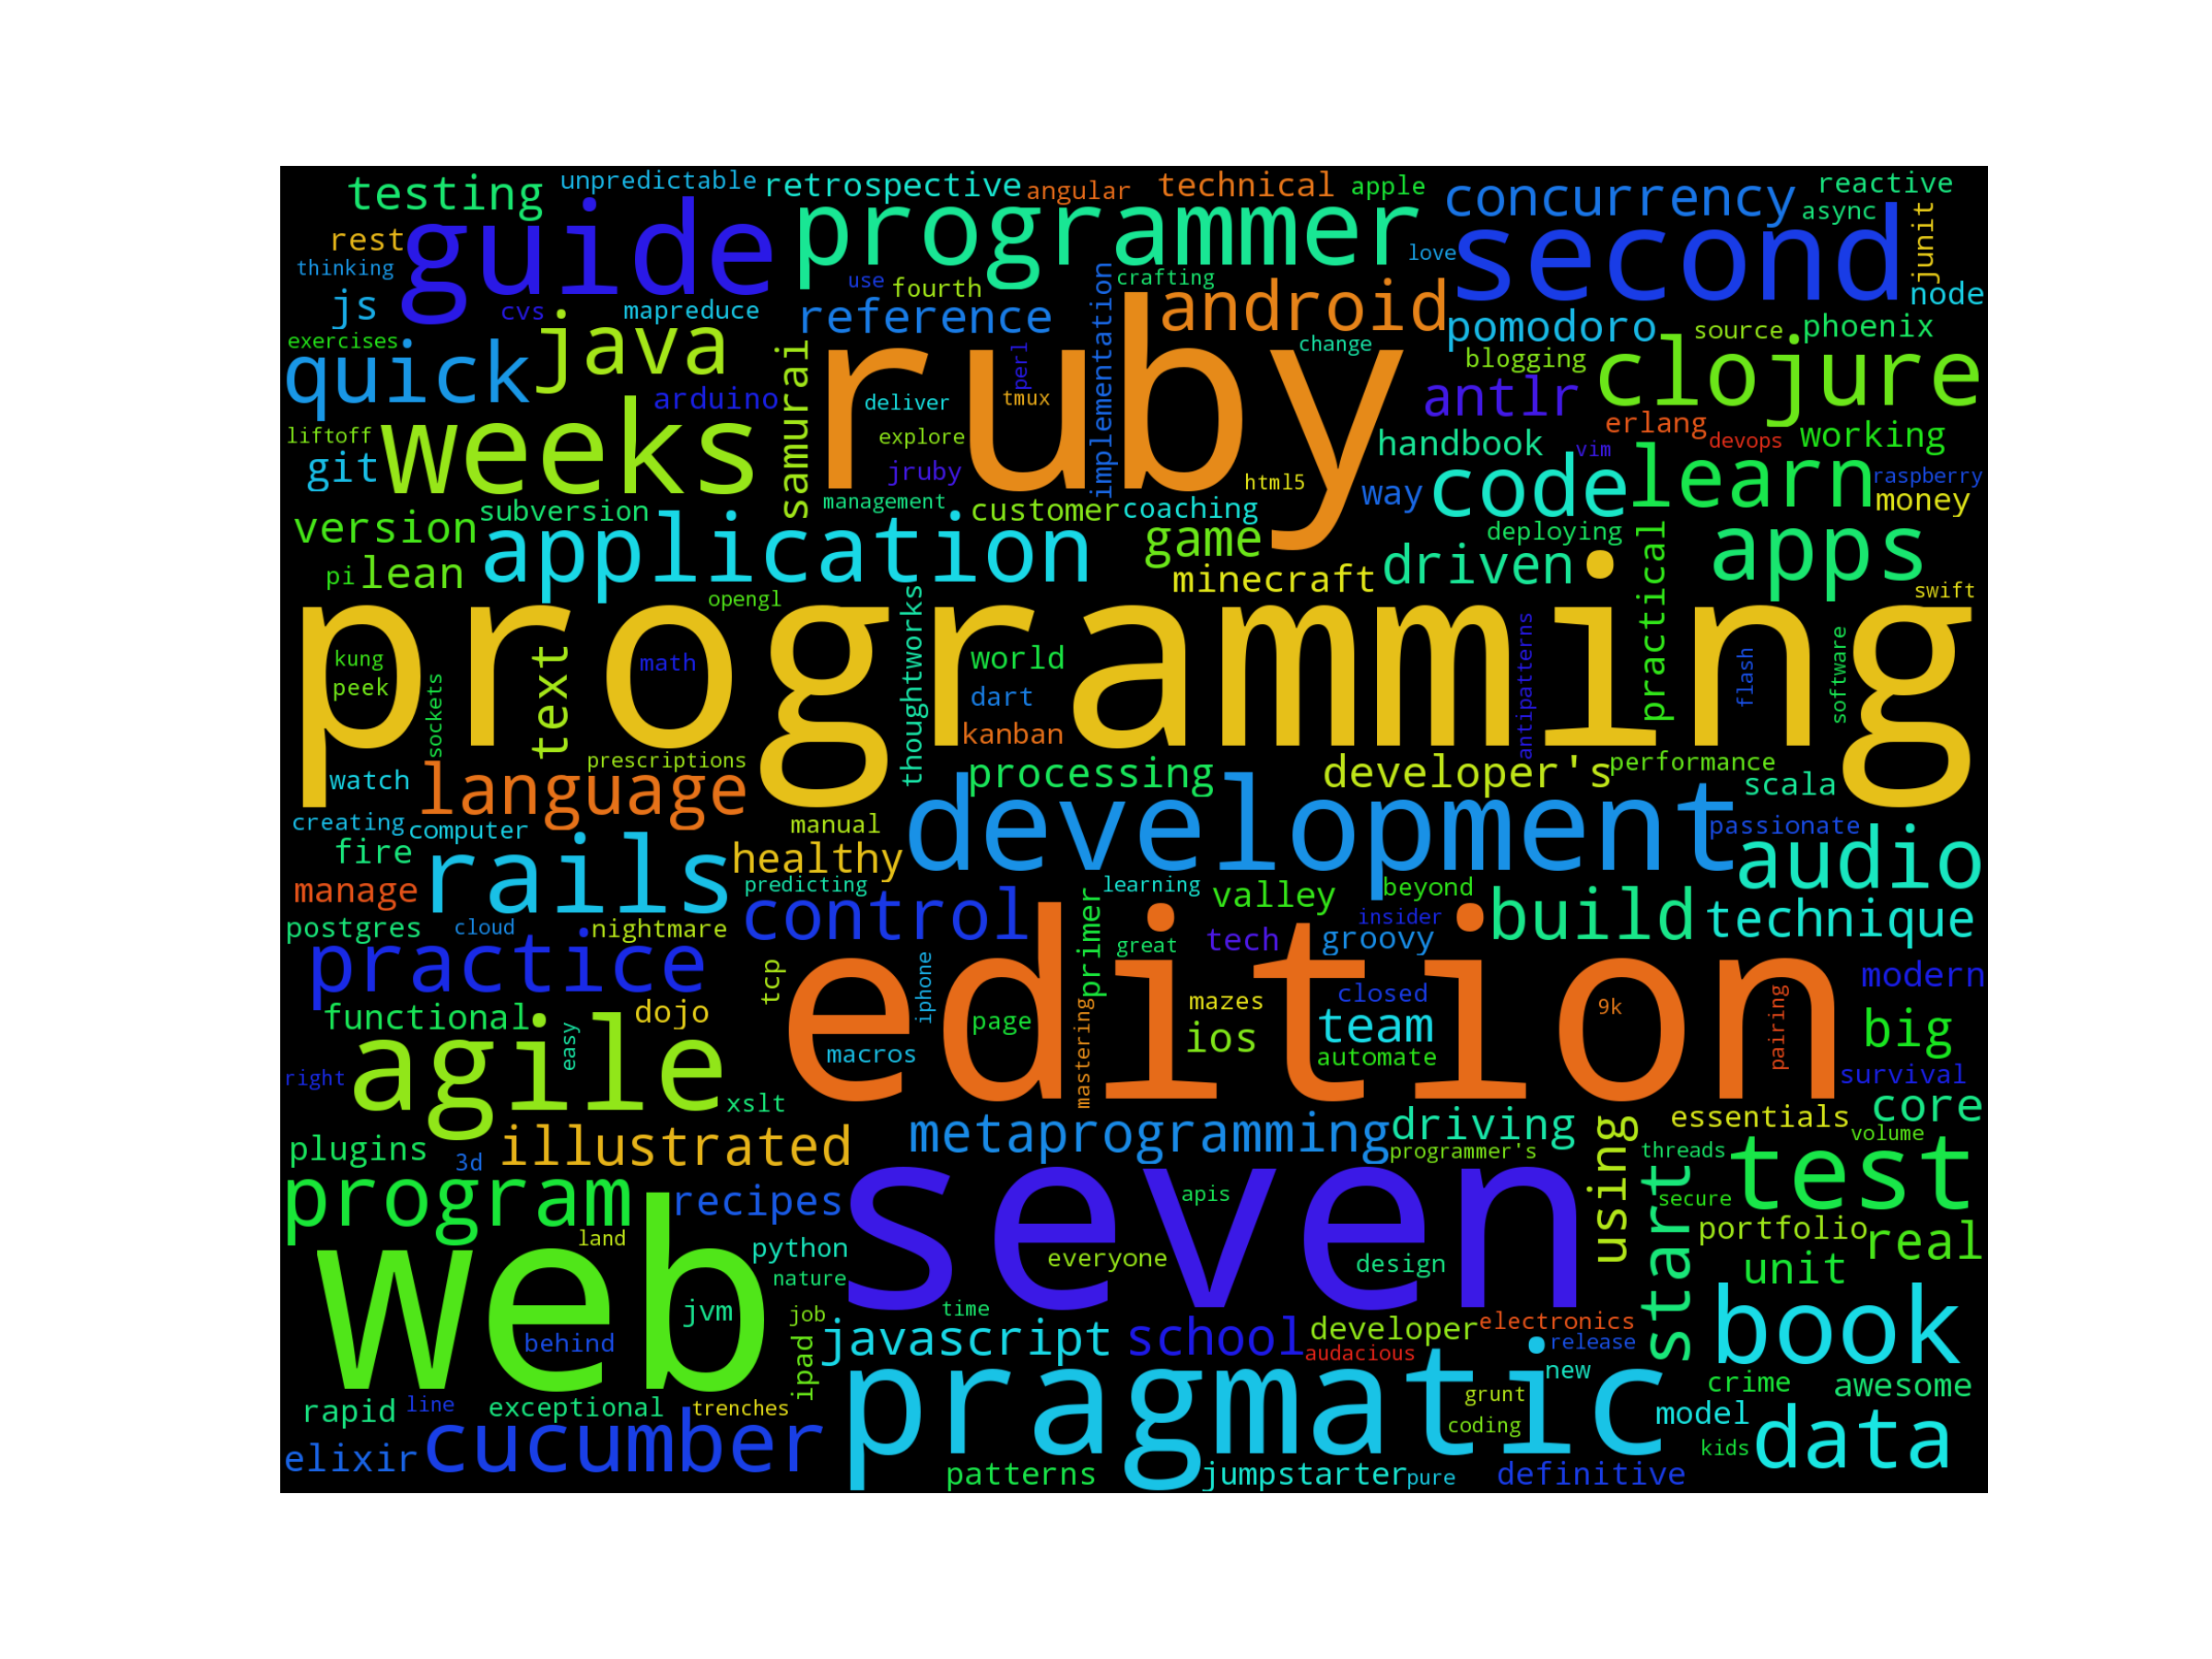

In [220]:
Image(filename='PragmaticTitles.png')

## Word count to get the frequently occuring words

In [198]:
get_word_count(PragmaticDataFrame)

# New file with groups/category of the books

First I checked the most frequent word list(getting from word cloud and word count) with the Tital of the Book, and  assigned the matched frequent word as a category or group of the books.
For other cases  I did it manually.


In [199]:
PragmaticDataFrame_new=pd.read_csv("PragmaticDataFrame1.csv")
del(PragmaticDataFrame_new['Unnamed: 0'])

In [200]:
PragmaticDataFrame_new.head(5)


,Title,Date of Publishing,Year,Category
0,101 design ingredients to solve big tech problems,31/07/2013,2013,General Interest
1,3d game programming for kids,23/10/2013,2013,Programming languages
2,agile and lean program management,30/03/2016,2016,Project Management
3,agile coaching,15/08/2009,2009,Project Management
4,agile in a flash,15/01/2011,2011,Project Management


# Data after 2010

In [185]:
PragmaticDataFrame_new=PragmaticDataFrame_new[PragmaticDataFrame_new['Year']>2010]

# NoStarch Analysis

## Helper function to get data from NoStarch Website ans transforming it into pandas dataframe

In [202]:
NoStarchList=[]
bf = get_data(url_nostarch).find_all("td", class_=re.compile("col-[first|last]"))
for book in bf:
    title = book.find("div", class_="views-field-title").find("span").find("a").get_text()
    date = book.find("div", class_="views-field-field-released-value").find("span").get_text()
    Year=date.split(" ")[1]
    NoStarchList.append((title,date,Year))



In [203]:
NoStarchDataFrame=pd.DataFrame(NoStarchList, columns=["Title","Date of Publishing","Year"])
NoStarchDataFrame.head(5)

,Title,Date of Publishing,Year
0,"Absolute FreeBSD, 2nd Edition",November 2007,2007
1,"Absolute OpenBSD, 2nd Edition",April 2013,2013
2,Android Security Internals,October 2014,2014
3,Apple Confidential 2.0,January 2004,2004
4,Arduino Playground,November 2016,2016


# Word Cloud for NoStarch Book's Title

In [204]:
get_word_cloud(NoStarchDataFrame)

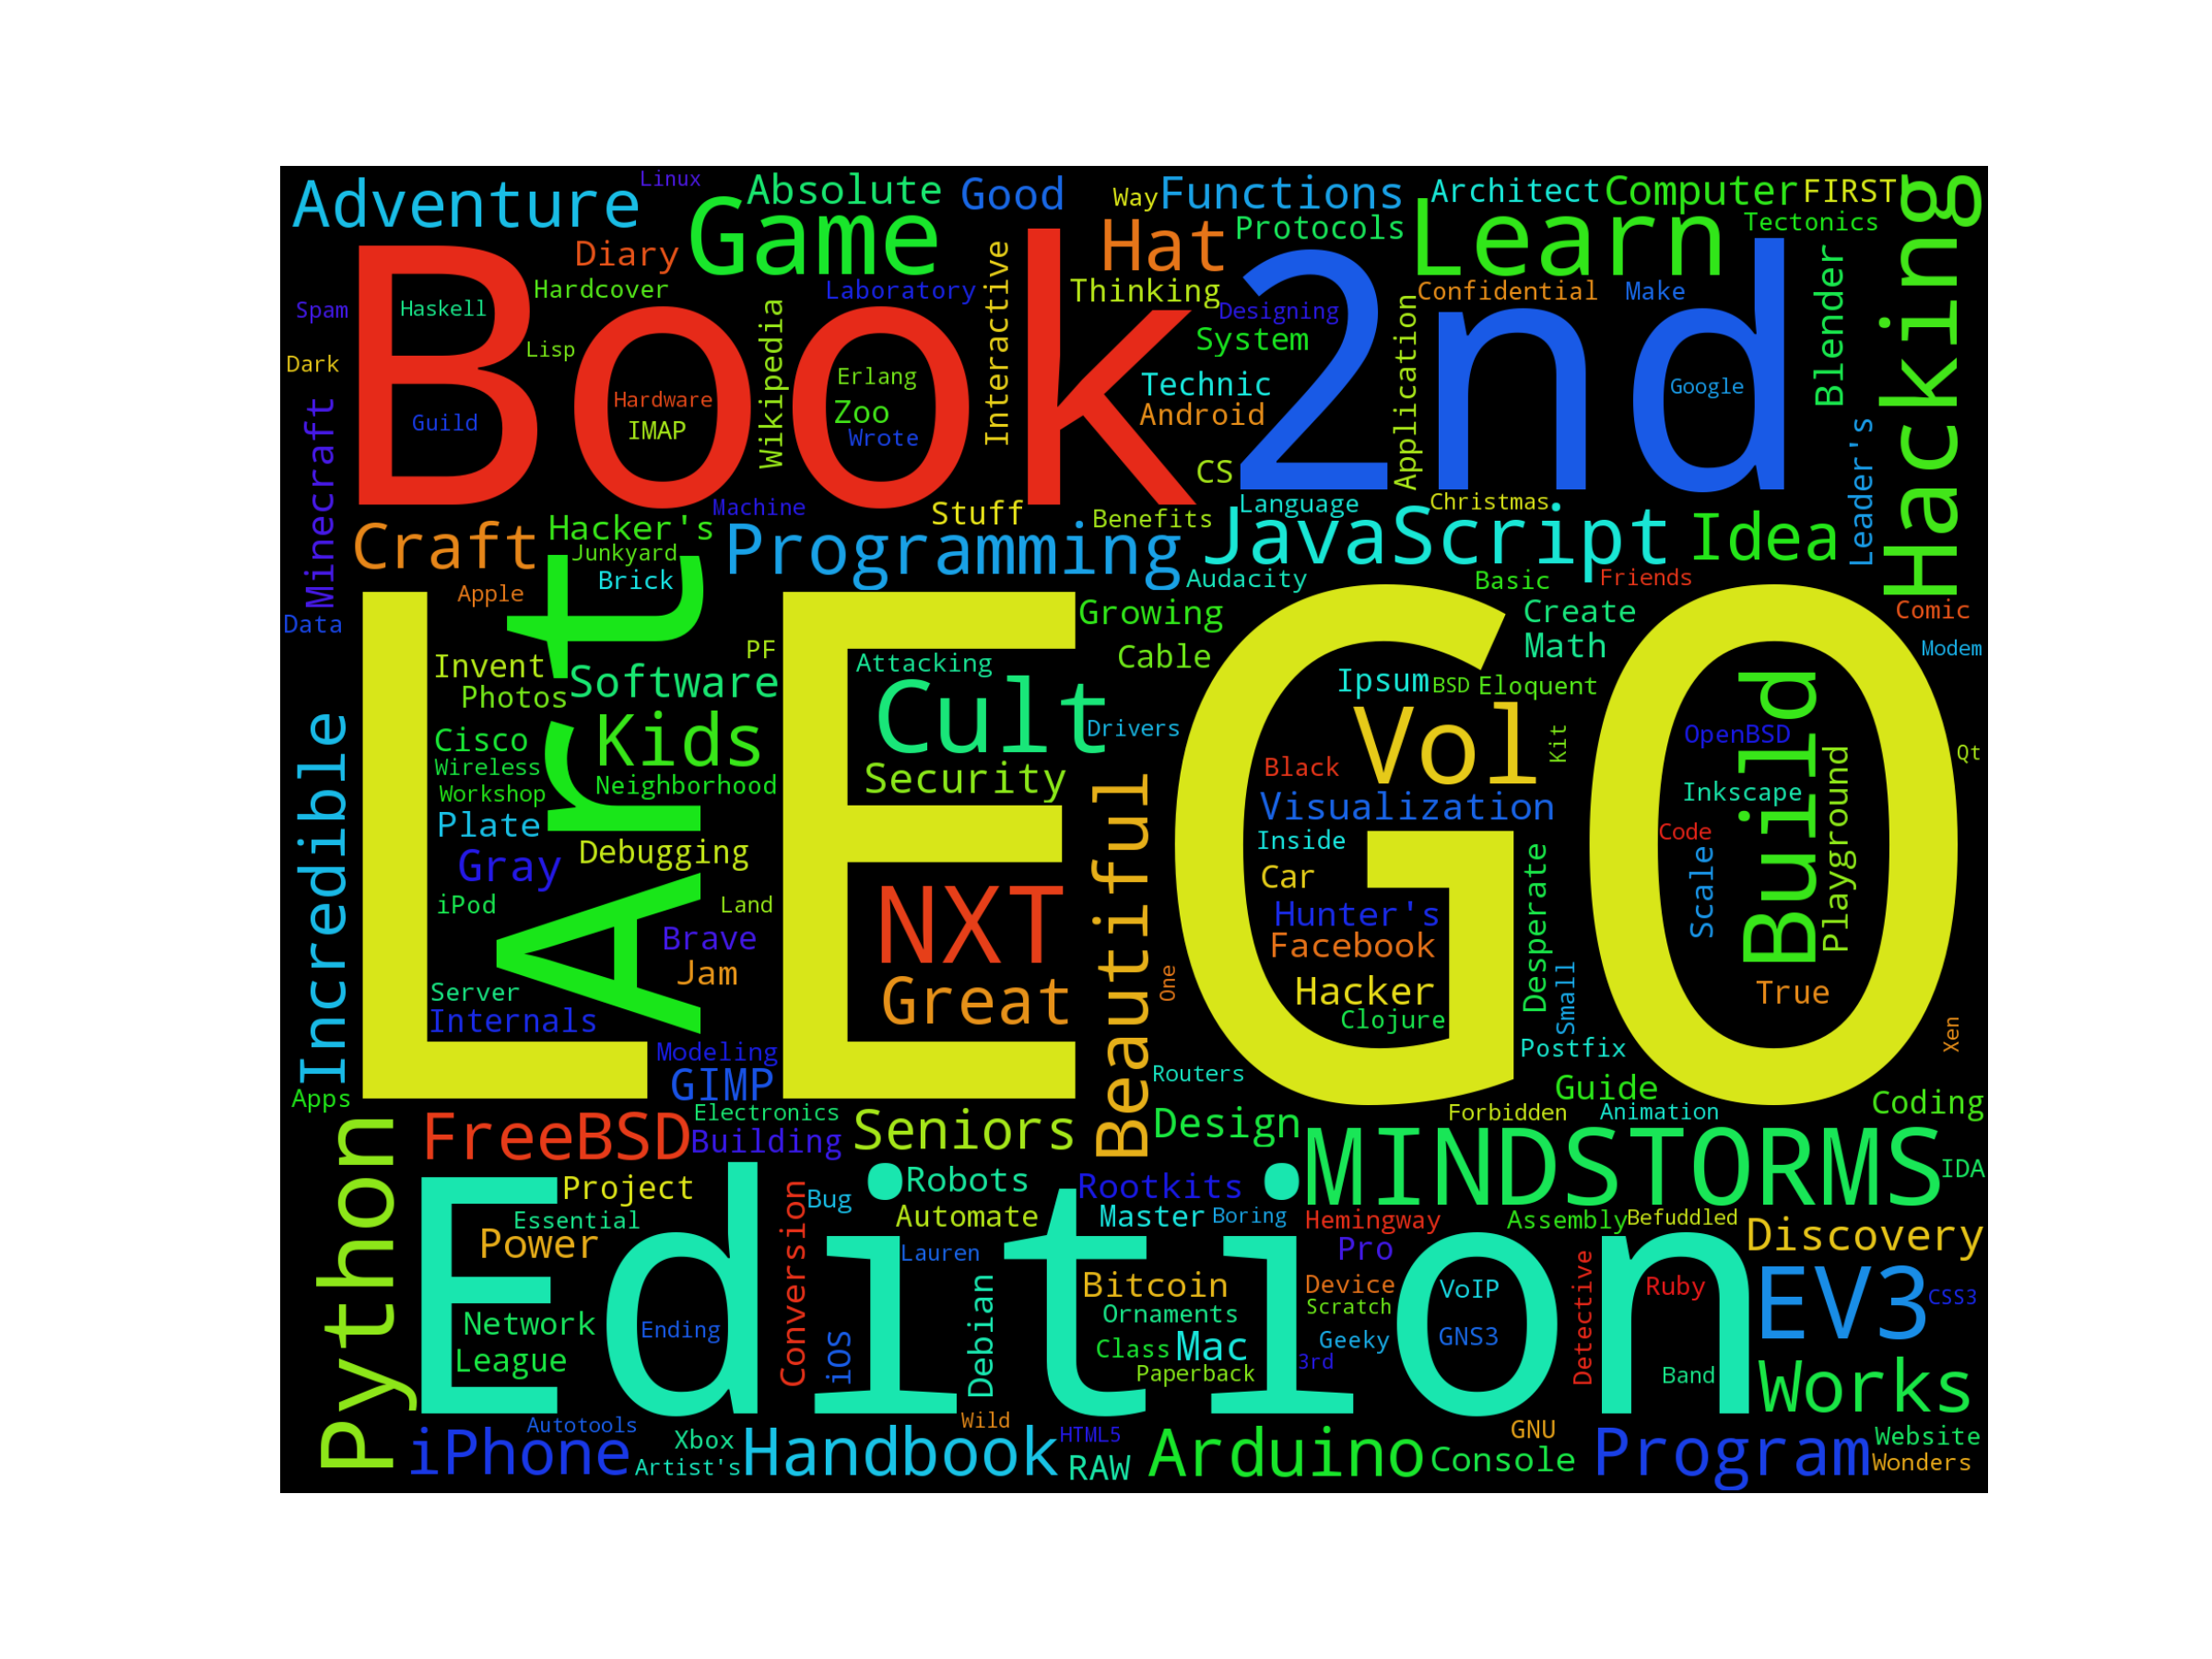

In [219]:

Image(filename='NoStarchTitles.png') 

# Word count function to get the high frequency words from Book's title

In [205]:
get_word_count(NoStarchDataFrame)

# New file with category/group of the books.

In [206]:
NoStarchDataFrame_new=pd.read_csv("NoStarchDataFrame.csv")

In [207]:
NoStarchDataFrame_new=pd.read_csv("NoStarchDataFrame.csv")
del(NoStarchDataFrame_new['Unnamed: 0'])
NoStarchDataFrame_new.head(5)


,Title,Date of Publishing,Year,Category
0,"Absolute FreeBSD, 2nd Edition",Nov-07,2007,Linux_and_BSD
1,"Absolute OpenBSD, 2nd Edition",Apr-13,2013,Linux_and_BSD
2,Android Security Internals,Oct-14,2014,Hacking_and_Computer_Security
3,Apple Confidential 2.0,Jan-04,2004,Hacking_and_Computer_Security
4,Arduino Playground,Nov-16,2016,Hardware_DIY


# Data after 2010

In [208]:
NoStarchDataFrame_new=NoStarchDataFrame_new[NoStarchDataFrame_new['Year']>2010]

## Percentage distribution of different groups of book in Pragmatic and NoStarch

In [209]:

NoStarchDataFrame_new_Percentage=NoStarchDataFrame_new.groupby("Category").size() * 100 / NoStarchDataFrame_new.shape[0]

In [210]:
PragmaticDataFrame_new_Percentage=PragmaticDataFrame_new.groupby("Category").size() * 100 / PragmaticDataFrame_new.shape[0]

In [211]:
PragmaticDataFrame_new_Percentage=pd.DataFrame(PragmaticDataFrame_new_Percentage)
NoStarchDataFrame_new_Percentage=pd.DataFrame(NoStarchDataFrame_new_Percentage)

In [212]:
PragmaticDataFrame_new_Percentage.to_csv("PragmaticDataFrame_new_Percentage.csv")
NoStarchDataFrame_new_Percentage.to_csv("NoStarchDataFrame_new_Percentage.csv")

In [213]:
NoStarchDataFrame_new_Percentage.columns=['Percentage']
PragmaticDataFrame_new_Percentage.columns=['Percentage']


# 5. Understand and compare the technology-wise coverage for each publisher


### First column is of Pragmatic and second column is of NoStarch 

In [215]:
pd.concat([PragmaticDataFrame_new_Percentage, NoStarchDataFrame_new_Percentage], axis=1)

,Percentage,Percentage
Art & Design,11.258278,NaN
Big Data,0.662252,NaN
Cloud Computing,0.662252,NaN
General,NaN,6.172840
General Interest,17.218543,NaN
Hacking_and_Computer_Security,NaN,8.641975
Hardware / DIY,0.662252,NaN
Hardware_DIY,NaN,3.703704
Java,5.298013,3.703704
Kids,NaN,7.407407


# Dummies Analysis

## Helper function to get data from dummy.com

In [53]:
DummiesList=[]
bf = get_data(url_dummies).find_all("div",class_="product-listing size80")
for book in bf:
    title = book.find("div", class_="product-title").find("a").get_text()
    DummiesList.append((title))

In [54]:
DummiesDataFrame=pd.DataFrame(DummiesList, columns=["Title"])

In [55]:
DummiesDataFrame.to_csv("DummiesDataFrame.csv")

# 6. Tree map

## Tree map for Pragmatic

In [216]:
Pragmaticfile=pd.read_csv('PragmaticDataFrame_new_Percentage.csv')
website="Pragmatic"
get_tree_map(Pragmaticfile,website)

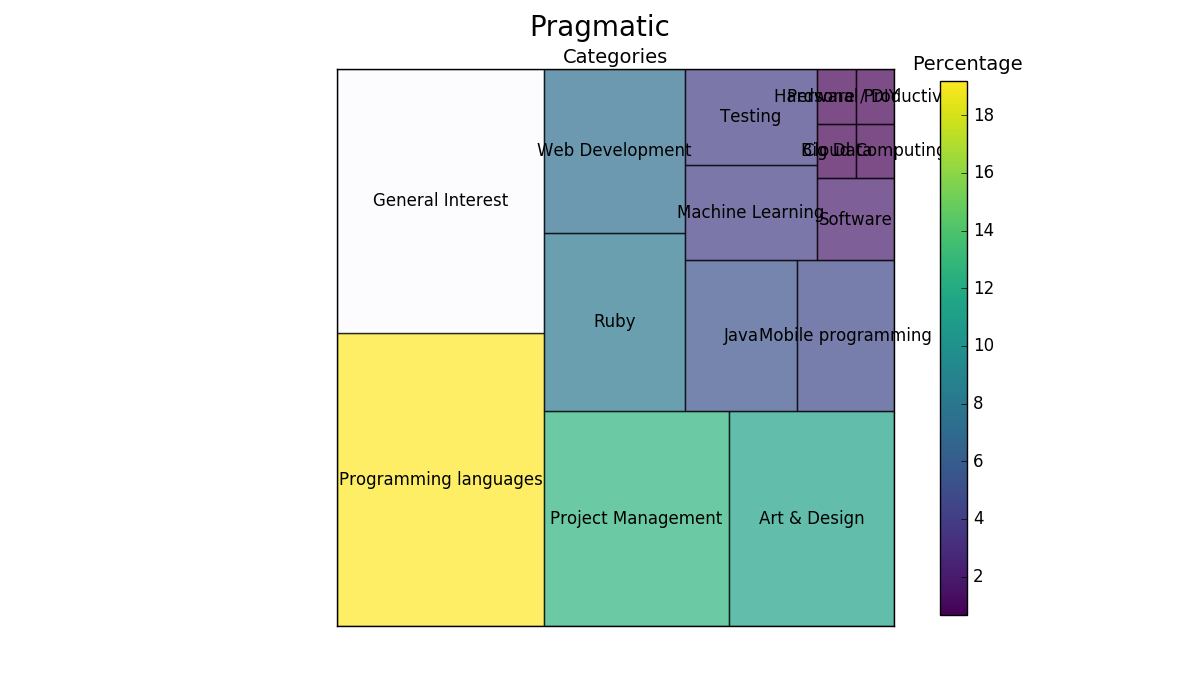

In [5]:
Image(filename='Pragmatic_TreeMap.png')

## Tree map for NoStarch 

In [217]:
NoStarchfile=pd.read_csv('NoStarchDataFrame_new_Percentage.csv')
website="NoStarch"
get_tree_map(Starchfile,website)

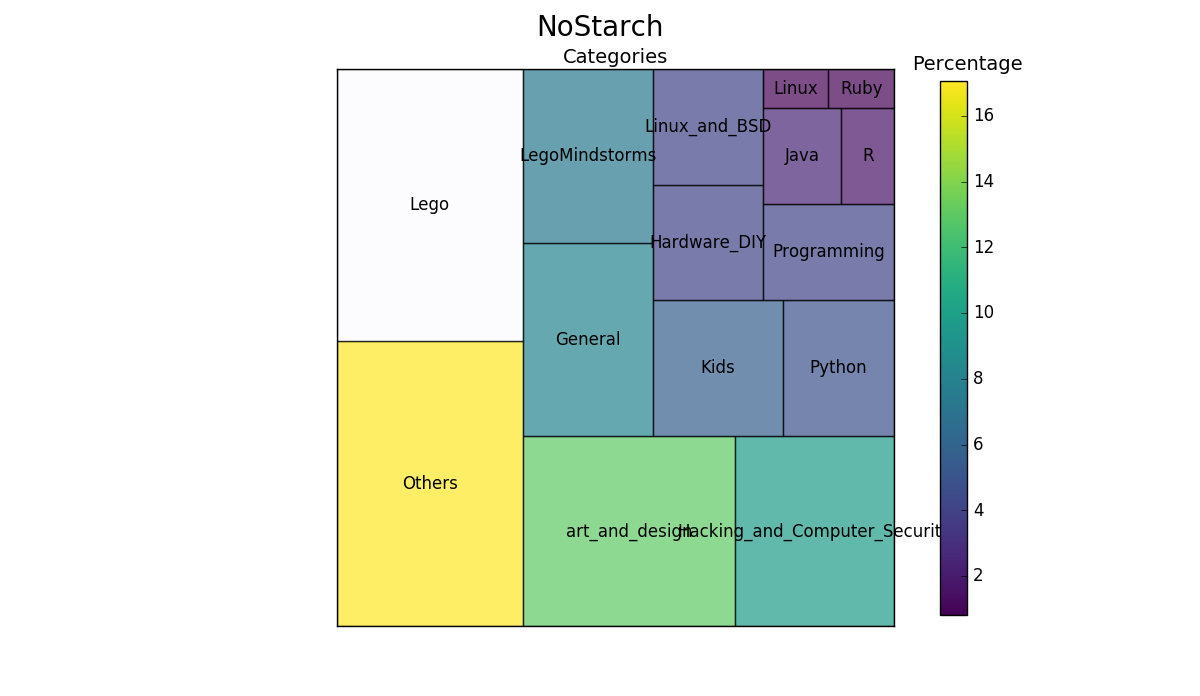

In [4]:
from IPython.display import Image
Image(filename='NoStarch_TreeMap.png')